#### Data Source
The 2019 Boston Marathon was the 123rd running of the Boston Athletic Association's (B.A.A) Marathon. It took place on Monday, April 15, 2019 (Patriots' Day in Massachusetts). Lawrence Cherono won the men's foot race in 2:07:57 and Worknesh Degefa won the women's foot race in 2:23.31.
<a href>https://www.kaggle.com/datasets/daniboy370/boston-marathon-2019</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('boston-2019.csv')

In [3]:
df.head()

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
0,1,30,M,Kenya,2:07:57,7677,1,KEN
1,2,29,M,Ethiopia,2:07:59,7679,2,ETH
2,3,34,M,Kenya,2:08:07,7687,3,KEN
3,4,32,M,Kenya,2:08:54,7734,4,KEN
4,5,26,M,Kenya,2:08:55,7735,5,KEN


In [4]:
df.isnull().sum()

Rank_Tot        0
Age             0
Gender          0
Country         0
Result_hr       0
Result_sec      0
Rank_Gender     0
Country_code    0
dtype: int64

In [5]:
df.shape

(26651, 8)

In [6]:
df.describe()

,Rank_Tot,Age,Result_sec,Rank_Gender
count,26651.000000,26651.000000,26651.000000,26651.000000
mean,13326.800946,42.799895,13980.057184,6731.454242
std,7693.901503,11.537523,2697.850346,3962.252174
min,1.000000,18.000000,7677.000000,1.000000
25%,6664.500000,34.000000,12025.500000,3332.000000
50%,13327.000000,43.000000,13534.000000,6664.000000
75%,19989.500000,51.000000,15538.500000,9995.000000
max,26652.000000,83.000000,25197.000000,14671.000000


In [7]:
df.dtypes

Rank_Tot         int64
Age              int64
Gender          object
Country         object
Result_hr       object
Result_sec       int64
Rank_Gender      int64
Country_code    object
dtype: object

In [8]:
df.set_index('Rank_Tot',inplace=True)

In [9]:
df['Gender'].value_counts()

M    14670
F    11981
Name: Gender, dtype: int64

Define Age Groups and divide age into the bins

In [10]:
bins=[18,25,30,35,40,45,50,55,60,70,80]

labels=['18-24','25-29', '30-34','35-39', '40-44','45-49','50-54','55-59','60-69','70-80']
df['Agegroup']= pd.cut(df['Age'],bins=bins,labels=labels)

In [11]:
df.head(15)

,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code,Agegroup
Rank_Tot,,,,,,,,
1,30,M,Kenya,2:07:57,7677,1,KEN,25-29
2,29,M,Ethiopia,2:07:59,7679,2,ETH,25-29
3,34,M,Kenya,2:08:07,7687,3,KEN,30-34
4,32,M,Kenya,2:08:54,7734,4,KEN,30-34
5,26,M,Kenya,2:08:55,7735,5,KEN,25-29
6,28,M,Kenya,2:08:57,7737,6,KEN,25-29
7,27,M,United States,2:09:09,7749,7,USA,25-29
8,30,M,United States,2:09:25,7765,8,USA,25-29
9,24,M,Kenya,2:09:25,7765,9,KEN,18-24


#### Top 100 Women by Country

In [12]:
dfw=df[df['Gender']=='F']


In [13]:
dfw.reset_index(inplace=True)

In [14]:
dfw100=dfw[dfw['Rank_Gender']<=100]
dfw100.shape

(100, 9)

In [15]:
dfwtop = dfw100['Rank_Tot'].groupby(dfw100['Country']).count()
# dfwtop = pd.DataFrame(data=dfwtop, columns=['Count'])
dfwtop = pd.DataFrame(dfwtop)
dfwtop.reset_index(inplace=True)
dfwtop.rename(columns={'Country':'Country','Rank_Tot':'Count'},inplace=True)
dfwtop

,Country,Count
0,Canada,4
1,Chile,1
2,China,1
3,Ethiopia,3
4,Ireland,1
5,Japan,2
6,Kenya,6
7,Netherlands,1
8,Peru,1
9,Sweden,1


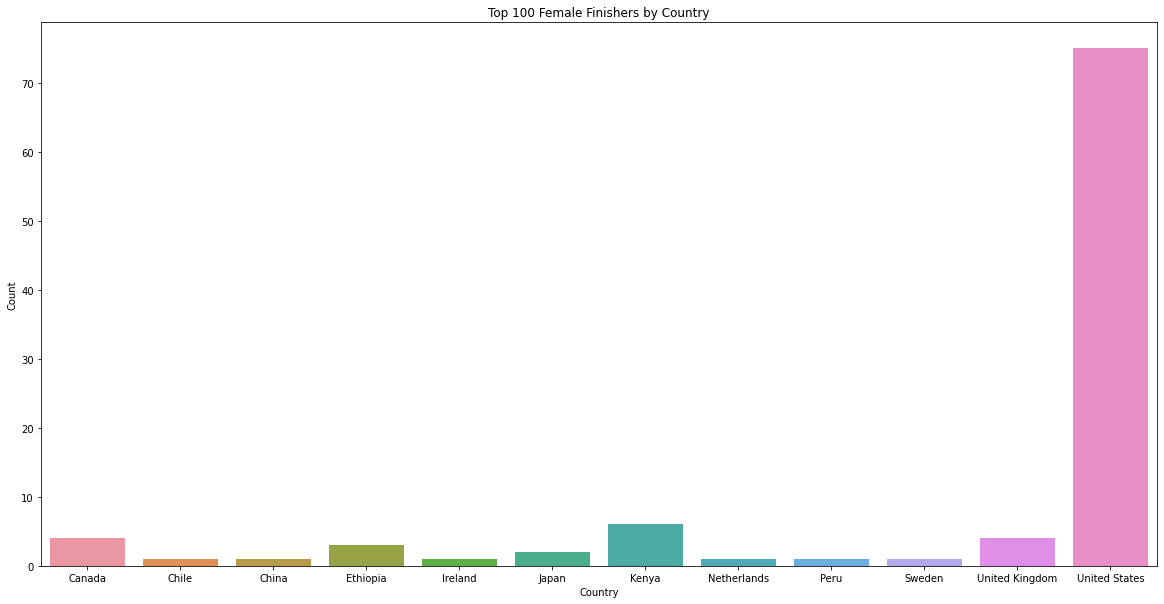

In [16]:
plt.figure(figsize=(20,10))
plt.title('Top 100 Female Finishers by Country')
sns.barplot(data=dfwtop, x='Country', y='Count')
plt.show()

#### Top 100 Men by Country

In [17]:
dfm=df[df['Gender']=='M']
dfm.reset_index(inplace=True)
dfm100=dfm[dfm['Rank_Gender']<=100]
dfmtop_s = dfm100['Rank_Tot'].groupby(dfm100['Country']).count()
dfmtop = pd.DataFrame(dfmtop_s)
dfmtop.reset_index(inplace=True)
dfmtop.rename(columns={'Country':'Country','Rank_Tot':'Count'},inplace=True)
dfmtop

,Country,Count
0,Argentina,1
1,Australia,2
2,Canada,2
3,China,1
4,Dominican Republic,1
5,Eritrea,1
6,Ethiopia,2
7,Germany,1
8,Israel,1
9,Japan,6


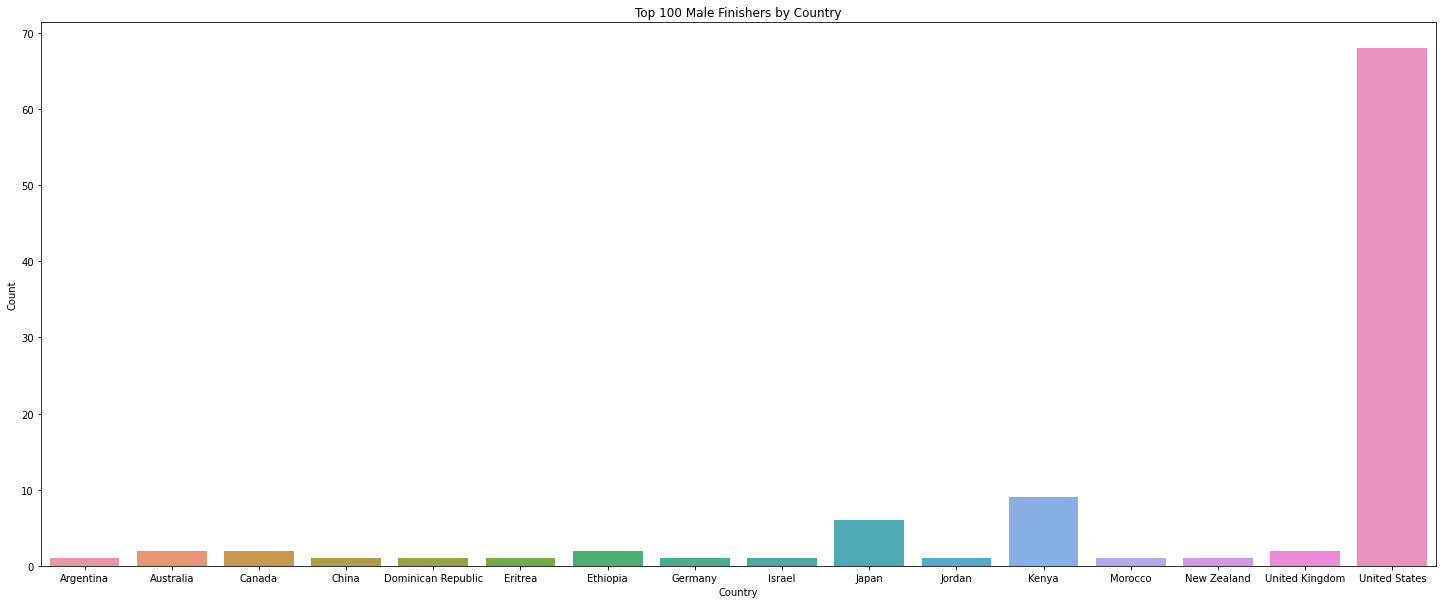

In [18]:
plt.figure(figsize=(25,10))
plt.title('Top 100 Male Finishers by Country')
sns.barplot(data=dfmtop, x='Country', y='Count')
plt.show()

#### Avg Fast times by Country - Women

In [19]:
dfw

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code,Agegroup
0,36,28,F,Ethiopia,2:23:31,8611,1,ETH,25-29
1,38,39,F,Kenya,2:24:13,8653,2,KEN,35-39
2,48,27,F,United States,2:25:20,8720,3,USA,25-29
3,52,27,F,Ethiopia,2:25:40,8740,4,ETH,25-29
4,61,35,F,United States,2:27:00,8820,5,USA,30-34
...,...,...,...,...,...,...,...,...,...
11976,26640,44,F,United States,6:21:19,22879,11977,USA,40-44
11977,26641,50,F,United States,6:22:27,22947,11978,USA,45-49
11978,26648,32,F,United States,6:35:50,23750,11979,USA,30-34
11979,26650,55,F,United States,6:53:38,24818,11980,USA,50-54


In [20]:
dfw1=dfw['Result_sec'].groupby(df['Country']).mean()
dfw1=pd.DataFrame(data=dfw1)
dfw1.reset_index(inplace=True)
dfw1.rename(columns={'Country':'Country','Result_sec':'Avg_sec'},inplace=True)


In [21]:
dfw1=dfw1.sort_values (by=['Avg_sec'],ascending=True).head(10)
dfw1

,Country,Avg_sec
26,Eritrea,9334.000000
48,Kenya,9987.235294
46,Jordan,10014.000000
28,Ethiopia,10765.142857
62,Palestine,11371.000000
82,Turkey,12336.500000
47,Kazakhstan,12698.000000
24,Egypt,12922.500000
43,Israel,12942.500000
35,Guyana,12998.000000


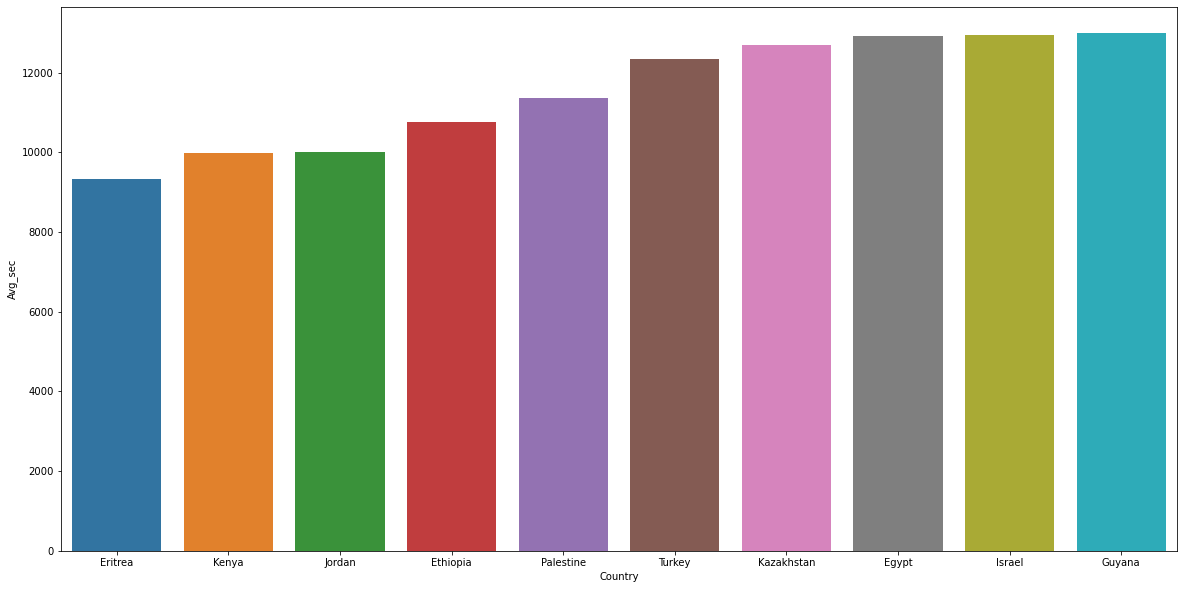

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(data=dfw1, x='Country', y='Avg_sec')
plt.show()

In [23]:
# dfw_18_24=df[(df['Agegroup']=='18-24') & (df['Gender']=='F')]
# dfw_18_24['Agegrouprank'] = dfw_18_24['Result_sec'].rank(method='min')
# dfw_18_24.head()



#### Finishing time by Age Group for Male and Female runners
+ Finishing times get slower with age for both Male and Female runners

<AxesSubplot:xlabel='Agegroup', ylabel='Result_sec'>

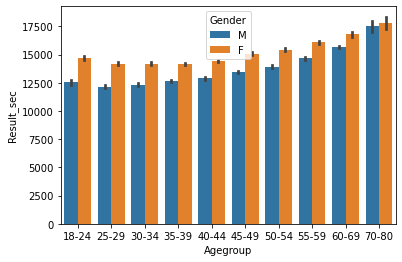

In [24]:
sns.barplot(data=df,x='Agegroup',y='Result_sec',hue='Gender')

#### Total Female finishers by age group  
+ Age group 35-39 and 40-44 has most finishers

,Agegroup,Finishers
0,18-24,943
1,25-29,1725
2,30-34,1561
3,35-39,1876
4,40-44,1869
5,45-49,1688
6,50-54,1121
7,55-59,708
8,60-69,445
9,70-80,30


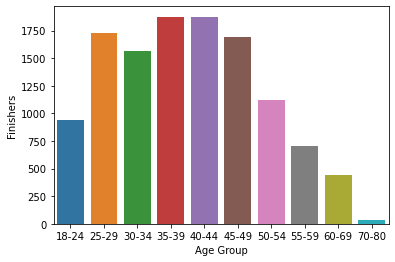

In [25]:
dfw_agegrp_s=dfw['Rank_Tot'].groupby(dfw['Agegroup']).count()
dfw_agegrp=dfw_agegrp_s.to_frame()
dfw_agegrp.reset_index(inplace=True)
col={'Agegroup':'Agegroup', 'Rank_Tot':'Count'}
dfw_agegrp.rename(columns={'Agegroup':'Agegroup', 'Rank_Tot':'Finishers'},inplace=True)
# # sns.barplot(data=dfwx,y=dfwx.index,x=dfwx.values)
sns.barplot(data=dfw_agegrp,y=dfw_agegrp['Finishers'],x=dfw_agegrp['Agegroup'])
plt.xlabel('Age Group')
plt.ylabel('Finishers')
dfw_agegrp

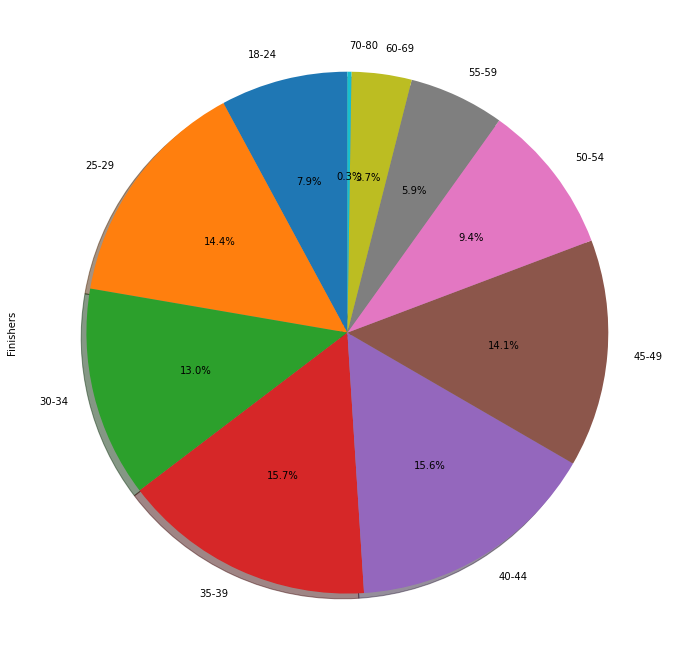

In [26]:
%matplotlib inline
plt.figure(figsize=(12,12))
dfw_agegrp_s.rename('Finishers',inplace=True)
dfw_agegrp_s.plot.pie(y=dfw_agegrp_s.index,autopct='%1.1f%%', shadow=True, startangle=90)
# dfw_agegrp.plot.pie(x='Agegroup', y='Finishers',autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()


#### Total Male finishers by age group
+ Age group 45-49 has the most finishers

Text(0, 0.5, 'Finishers')

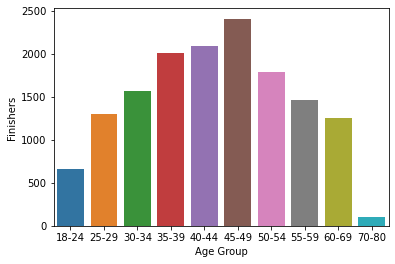

In [27]:
dfm_agegrp_s=dfm['Rank_Tot'].groupby(dfm['Agegroup']).count()
dfm_agegrp=dfm_agegrp_s.to_frame()
dfm_agegrp.reset_index(inplace=True)
col={'Agegroup':'Agegroup', 'Rank_Tot':'Count'}
dfm_agegrp.rename(columns={'Agegroup':'Agegroup', 'Rank_Tot':'Finishers'},inplace=True)
# # sns.barplot(data=dfwx,y=dfwx.index,x=dfwx.values)
sns.barplot(data=dfm_agegrp,x=dfm_agegrp['Agegroup'], y=dfm_agegrp['Finishers'])
plt.xlabel('Age Group')
plt.ylabel('Finishers')

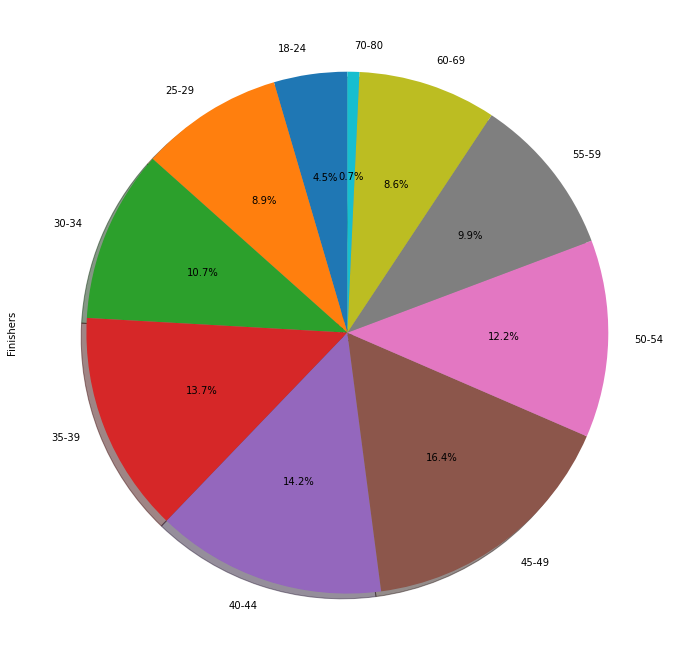

In [28]:
%matplotlib inline
plt.figure(figsize=(12,12))
dfm_agegrp_s.rename('Finishers',inplace=True)
dfm_agegrp_s.plot.pie(y=dfm_agegrp_s.index,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [29]:
dfw_age_fast=dfw['Result_sec'].groupby(dfw['Agegroup']).min()
dfw_age_fast

Agegroup
18-24     9662
25-29     8611
30-34     8820
35-39     8653
40-44     9116
45-49     9484
50-54    10871
55-59    11491
60-69    11040
70-80    14635
Name: Result_sec, dtype: int64

In [30]:
dfw_age_fast.rename('Time',inplace=True)


Agegroup
18-24     9662
25-29     8611
30-34     8820
35-39     8653
40-44     9116
45-49     9484
50-54    10871
55-59    11491
60-69    11040
70-80    14635
Name: Time, dtype: int64

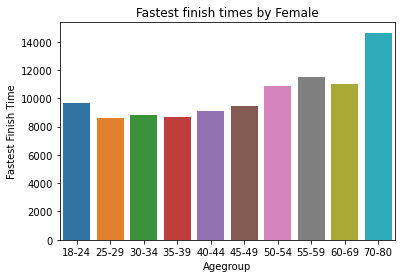

In [31]:
sns.barplot(x=dfw_age_fast.index,y=dfw_age_fast.values)
plt.title('Fastest finish times by Female')
plt.ylabel('Fastest Finish Time')
plt.show()

In [32]:
dfm_age_fast=dfm['Result_sec'].groupby(dfm['Agegroup']).min()
dfm_age_fast

Agegroup
18-24     7765
25-29     7677
30-34     7687
35-39     8179
40-44     8336
45-49     8922
50-54     9131
55-59    10349
60-69    10560
70-80    10730
Name: Result_sec, dtype: int64

In [33]:
dfm_age_fast.rename('Time',inplace=True)


Agegroup
18-24     7765
25-29     7677
30-34     7687
35-39     8179
40-44     8336
45-49     8922
50-54     9131
55-59    10349
60-69    10560
70-80    10730
Name: Time, dtype: int64

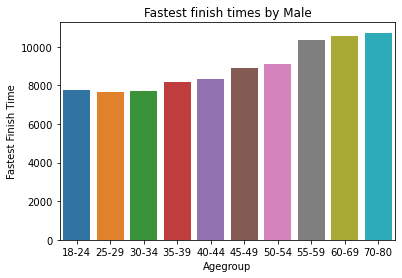

In [34]:
sns.barplot(x=dfm_age_fast.index,y=dfm_age_fast.values)
plt.title('Fastest finish times by Male')
plt.ylabel('Fastest Finish Time')
plt.show()

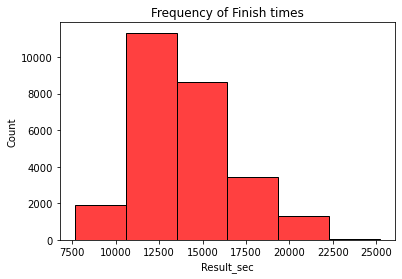

In [35]:
# sns.histplot(data=df,x='Result_hr',bins=4)
sns.histplot(df['Result_sec'], kde=False, color='red', bins=6)
plt.title('Frequency of Finish times')
plt.show()
